In [1]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test images/maxresdefault.jpg')
img.shape

(720, 1280, 3)

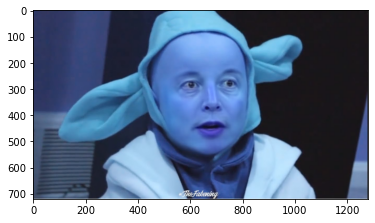

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
#plt.imshow(gray)

(720, 1280)

In [5]:
gray

array([[  7,  70,  69, ...,  19,  43,   1],
       [  7,  70,  69, ...,  19,  43,   1],
       [  7,  70,  69, ...,  19,  43,   1],
       ...,
       [  5,  66,  80, ..., 129,  39,   0],
       [  1,  59,  39, ..., 121,  28,   8],
       [  5, 245, 248, ..., 253,   0,   1]], dtype=uint8)

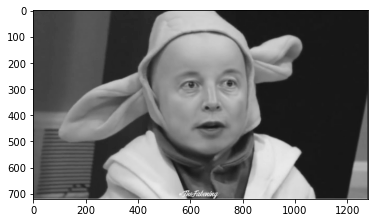

In [6]:
plt.imshow(gray,cmap="gray")

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[470, 121, 405, 405]], dtype=int32)

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(470, 121, 405, 405)

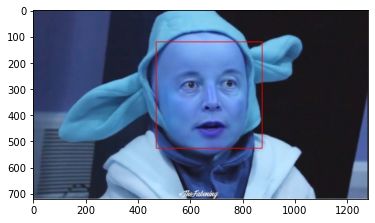

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

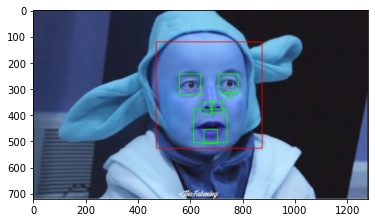

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

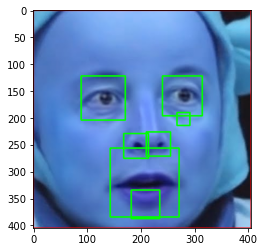

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

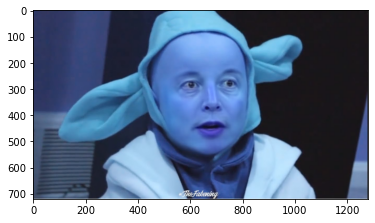

In [13]:
original_image=cv2.imread('./test images/maxresdefault.jpg')
plt.imshow(original_image)

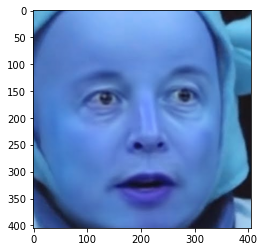

In [14]:
cropped_image=get_cropped_image_if_2_eyes('./test images/maxresdefault.jpg')
plt.imshow(cropped_image)

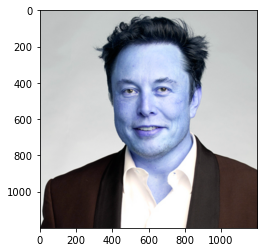

In [15]:
original_image=cv2.imread('./test images/elo.jpg')
plt.imshow(original_image)

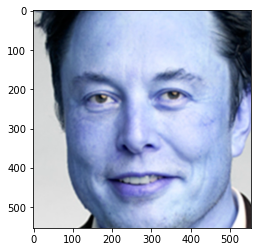

In [16]:
cropped_image=get_cropped_image_if_2_eyes('./test images/elo.jpg')
plt.imshow(cropped_image)

In [17]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/CROPPED/"

In [18]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/CROPPED',
 './dataset/elon_musk',
 './dataset/ginni_rometty',
 './dataset/gwynne_shotwell',
 './dataset/lynda_weinman',
 './dataset/marissa_mayer',
 './dataset/meg_whitman',
 './dataset/sheryl_sandberg',
 './dataset/susan_wojcicki']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
bznzprsn_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    bznzprsn_name = img_dir.split('/')[-1]
    print(bznzprsn_name)
    
    bznzprsn_file_names_dict[bznzprsn_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + bznzprsn_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = bznzprsn_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            bznzprsn_file_names_dict[bznzprsn_name].append(cropped_file_path)
            count += 1


CROPPED
elon_musk
Generating cropped images in folder:  ./dataset/CROPPED/elon_musk
ginni_rometty
Generating cropped images in folder:  ./dataset/CROPPED/ginni_rometty
gwynne_shotwell
Generating cropped images in folder:  ./dataset/CROPPED/gwynne_shotwell
lynda_weinman
Generating cropped images in folder:  ./dataset/CROPPED/lynda_weinman
marissa_mayer
Generating cropped images in folder:  ./dataset/CROPPED/marissa_mayer
meg_whitman
Generating cropped images in folder:  ./dataset/CROPPED/meg_whitman
sheryl_sandberg
Generating cropped images in folder:  ./dataset/CROPPED/sheryl_sandberg
susan_wojcicki
Generating cropped images in folder:  ./dataset/CROPPED/susan_wojcicki


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [23]:
bznzprsn_file_names_dict

{'CROPPED': [],
 'elon_musk': ['./dataset/CROPPED/elon_musk/elon_musk1.png',
  './dataset/CROPPED/elon_musk/elon_musk2.png',
  './dataset/CROPPED/elon_musk/elon_musk3.png',
  './dataset/CROPPED/elon_musk/elon_musk4.png',
  './dataset/CROPPED/elon_musk/elon_musk5.png',
  './dataset/CROPPED/elon_musk/elon_musk6.png',
  './dataset/CROPPED/elon_musk/elon_musk7.png',
  './dataset/CROPPED/elon_musk/elon_musk8.png',
  './dataset/CROPPED/elon_musk/elon_musk9.png',
  './dataset/CROPPED/elon_musk/elon_musk10.png',
  './dataset/CROPPED/elon_musk/elon_musk11.png',
  './dataset/CROPPED/elon_musk/elon_musk12.png',
  './dataset/CROPPED/elon_musk/elon_musk13.png',
  './dataset/CROPPED/elon_musk/elon_musk14.png',
  './dataset/CROPPED/elon_musk/elon_musk15.png',
  './dataset/CROPPED/elon_musk/elon_musk16.png',
  './dataset/CROPPED/elon_musk/elon_musk17.png',
  './dataset/CROPPED/elon_musk/elon_musk18.png',
  './dataset/CROPPED/elon_musk/elon_musk19.png',
  './dataset/CROPPED/elon_musk/elon_musk20.png',


In [24]:
bznzprsn_file_names_dict = {}
for img_dir in cropped_image_dirs:
    bznzprsn_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    bznzprsn_file_names_dict[bznzprsn_name] = file_list
bznzprsn_file_names_dict

{'elon_musk': ['./dataset/CROPPED/elon_musk\\elon_musk1.png',
  './dataset/CROPPED/elon_musk\\elon_musk10.png',
  './dataset/CROPPED/elon_musk\\elon_musk11.png',
  './dataset/CROPPED/elon_musk\\elon_musk12.png',
  './dataset/CROPPED/elon_musk\\elon_musk13.png',
  './dataset/CROPPED/elon_musk\\elon_musk14.png',
  './dataset/CROPPED/elon_musk\\elon_musk15.png',
  './dataset/CROPPED/elon_musk\\elon_musk16.png',
  './dataset/CROPPED/elon_musk\\elon_musk17.png',
  './dataset/CROPPED/elon_musk\\elon_musk18.png',
  './dataset/CROPPED/elon_musk\\elon_musk19.png',
  './dataset/CROPPED/elon_musk\\elon_musk2.png',
  './dataset/CROPPED/elon_musk\\elon_musk20.png',
  './dataset/CROPPED/elon_musk\\elon_musk21.png',
  './dataset/CROPPED/elon_musk\\elon_musk22.png',
  './dataset/CROPPED/elon_musk\\elon_musk23.png',
  './dataset/CROPPED/elon_musk\\elon_musk24.png',
  './dataset/CROPPED/elon_musk\\elon_musk25.png',
  './dataset/CROPPED/elon_musk\\elon_musk26.png',
  './dataset/CROPPED/elon_musk\\elon_mu

In [25]:
class_dict = {}
count = 0
for bznzprsn_name in bznzprsn_file_names_dict.keys():
    class_dict[bznzprsn_name] = count
    count = count + 1
class_dict

{'elon_musk': 0,
 'ginni_rometty': 1,
 'gwynne_shotwell': 2,
 'lynda_weinman': 3,
 'marissa_mayer': 4,
 'meg_whitman': 5,
 'sheryl_sandberg': 6,
 'susan_wojcicki': 7}

In [26]:
import numpy as np
import pywt
import cv2    
cropped_img = np.array(roi_color)
cropped_img.shape
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

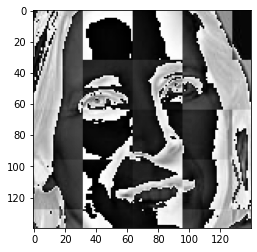

In [27]:

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [28]:

X, y = [], []
for bznzprsn_name, training_files in bznzprsn_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[bznzprsn_name])

In [29]:
len(X[0])

4096

In [30]:
X[0]

array([[53],
       [70],
       [89],
       ...,
       [11],
       [28],
       [52]], dtype=uint8)

In [31]:
y[0]

0

In [32]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape


(434, 4096)

In [33]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6238532110091743

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.56      0.77      0.65        13
           2       0.90      0.47      0.62        19
           3       1.00      0.17      0.29         6
           4       0.47      0.90      0.62        10
           5       1.00      0.17      0.29         6
           6       0.71      0.81      0.76        21
           7       0.47      0.57      0.52        14

    accuracy                           0.62       109
   macro avg       0.72      0.56      0.55       109
weighted avg       0.70      0.62      0.61       109



In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.698462,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.489231,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.741538,{'logisticregression__C': 5}


In [39]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(X_test,y_test)


0.7339449541284404

In [41]:
best_estimators['random_forest'].score(X_test,y_test)


0.44954128440366975

In [42]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.7339449541284404

In [43]:
best_clf = best_estimators['svm']


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[18,  1,  0,  0,  1,  0,  0,  0],
       [ 2, 11,  0,  0,  0,  0,  0,  0],
       [ 2,  1, 12,  0,  1,  0,  1,  2],
       [ 0,  0,  0,  2,  1,  0,  1,  2],
       [ 0,  0,  1,  1,  8,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  2,  0,  1],
       [ 0,  0,  1,  1,  0,  0, 18,  1],
       [ 2,  0,  1,  0,  0,  1,  1,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

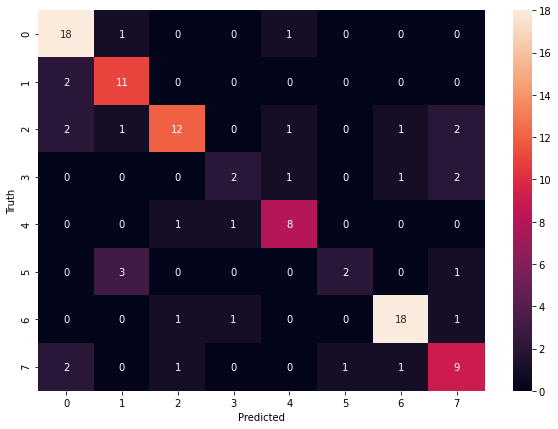

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
class_dict

{'elon_musk': 0,
 'ginni_rometty': 1,
 'gwynne_shotwell': 2,
 'lynda_weinman': 3,
 'marissa_mayer': 4,
 'meg_whitman': 5,
 'sheryl_sandberg': 6,
 'susan_wojcicki': 7}

In [47]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [48]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))